In [29]:
import math
ln2 = math.log(2)
def ln2over(t):
    return ln2/t
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Original data:
<img src=201502_plotting/method3_plot.png>

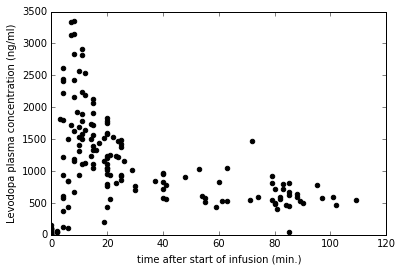

In [271]:
import csv
with open('Cp_estimation_20150304.csv', 'rb') as datafile:
    data  = np.genfromtxt(datafile, delimiter=",", usecols=range(0,7), names=True)  # imports as floats
    # the file has 7 blank rows at the end ...
    data = data[:-7]
data_times=data['new_minutes']
data_concs=data['LD']

%matplotlib inline
plt.scatter(data_times,data_concs,color='black')
plt.axis((0,120,0,3500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
plt.show()

In [31]:
glob_interval_end = np.asarray([2.5, 6.5, 10.0, 12.5, 17.5, 22.5, 27.5, 35, 45, 70, 90, 120])
# create a list of arrays with points selected from data, with one array for each interval
num_globs = glob_interval_end.size
globtime  = []
globconc  = []
globsize  = np.zeros([num_globs],int)
globmeant = np.zeros([num_globs])
globmeanc = np.zeros([num_globs])
globsdt = np.zeros([num_globs])
globsdc = np.zeros([num_globs])

DEBUG = True
start = -.001
for i in range(num_globs):
    end = glob_interval_end[i]
    items = np.logical_and(data_times > start,data_times <=end)
    globtime.append(data_times[np.nonzero(items)])  # this array is now globtime[i]
    globconc.append(data_concs[np.nonzero(items)])
    globsize[i]  = globtime[i].size
    globmeant[i] = np.mean(globtime[i])
    globmeanc[i] = np.mean(globconc[i])
    globsdt[i] = np.std(globtime[i])
    globsdc[i] = np.std(globconc[i])
    if DEBUG and i==2:
        print('interval i={0}, start time = {1}, end time = {2}, globsize[{0}]={3}'.\
              format(i,start,end,globsize[i]))
        # print(items)
        print(globtime[i])
        print(globconc[i])
        print('mean time in this interval: {0:.2f}; mean conc in this interval: {1:.2f}'.\
              format(globmeant[i], globmeanc[i]))
    start = end

interval i=2, start time = 6.5, end time = 10.0, globsize[2]=19
[  8.   7.   8.   8.   8.   8.   8.   7.   9.  10.   8.   7.  10.   8.  10.
   8.  10.  10.  10.]
[ 2165.  3130.  1185.  2420.  3141.  2830.  1627.  1722.  1924.  1698.
  3348.  3331.  2565.  1153.  1320.   664.   930.  1409.  1541.]
mean time in this interval: 8.53; mean conc in this interval: 2005.42


time:      0.4,    4.5,    8.5,   11.3,   15.0,   20.1,   24.5,   29.7,   39.9,   57.1,   82.0,  100.8
[LD]:     54.8, 1226.7, 2005.4, 1945.3, 1538.4, 1150.9, 1171.4,  828.7,  779.6,  702.1,  624.2,  589.8
S.D.:     40.3,  824.7,  828.0,  576.5,  324.5,  429.3,  242.9,  138.1,  146.2,  219.9,  244.5,  101.7
N   :       17,     17,     19,     12,     14,     22,     11,      3,      8,     10,     24,      5


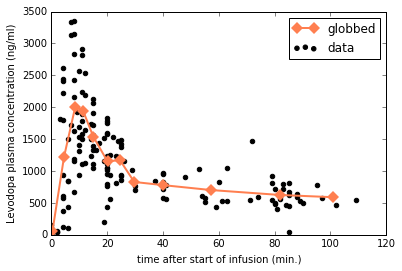

In [32]:
# First plot the real observed data.
plt.scatter(data_times,data_concs,color='black',label='data')
plt.axis((0,120,0,3500))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')
# plot the globbed points
plt.plot(globmeant,globmeanc,'coral',
         markersize=8,marker=('D'),markeredgewidth=0,linewidth=2.0,
         label='globbed') 
    # marker=(8,2,0),marker='D',marker='o',markeredgecolor='lime',
    # http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

plt.legend(loc='upper right')
printstringend = 11*'{:7.1f},'+'{:7.1f}'
print('time:  '+printstringend.format(*globmeant))
print('[LD]:  '+printstringend.format(*globmeanc))
print('S.D.:  '+printstringend.format(*globsdc))
printstringend = 11*'{:7d},'+'{:7d}'
print('N   :  '+printstringend.format(*globsize))
plt.show()

**The peak "glob" is probably a little lower than optimal because:**
1. some subjects have samples at (say) 6, 8 and 10 minutes, but of course only one of those is the peak for that subject, so including all 3 measures underestimates the peak;
2. some subjects have samples at (say) 8, 10 and 12 minutes, and the peak may occur at 12 minutes, outside the time limit for this glob.

For a better estimation of the peak time and concentration across subjects, based on each subject's peak in the 0 to 20-minute interval, see `Cp_estimation_20150304_20160806.xlsx` in `Box > Black_Lab\projects\PD\hysteresis_phMRI`.

In [33]:
debug = False

if debug:
    sample_n = 3
else:
    sample_n = 100

# c_samples  (for "concentration samples")
#   = 2D array, sample_n rows, each row with num_globs entries, each 
#   entry chosen at random from the corresponding glob interval.

points = np.empty(sample_n,dtype=np.uint16)
t_samples = np.empty([sample_n,num_globs])
c_samples = np.empty([sample_n,num_globs])
if debug:
    print(points)
    print(t_samples)
for i in range(num_globs):
    # Figure out which point to select from this glob of points:
    points = np.random.randint(globtime[i].size, size=sample_n)
if debug:
    print(globtime[i].size)
    print(points)
    for x in points:
        print(globtime[3][x])
    temp = []
    for x in points:
        temp.append(globtime[3][x])
    temp

In [34]:
for i in range(num_globs):
    # Figure out which point to select from this glob of points:
    points = np.random.randint(globtime[i].size, size=sample_n)
    if debug:
        print(globtime[i].size,'\t',points)
    for a in range(sample_n):
        t_samples[a,i] = globtime[i][points[a]]  # take points in this glob in the random order just defined
        c_samples[a,i] = globconc[i][points[a]]

# If I wanted to select time and conc. independent of each other, I could do this:
#    t_samples[:,i] = np.random.choice(globtime[i],size=sample_n,replace=True)
#    c_samples[:,i] = np.random.choice(globconc[i],size=sample_n,replace=True)

In [35]:
print(t_samples[:3,:])
print(c_samples[:3,:])

[[   0.    4.   10.   11.   15.   19.   24.   30.   40.   63.   79.  102.]
 [   0.    4.   10.   12.   14.   19.   25.   30.   40.   59.   80.  102.]
 [   0.    6.   10.   11.   15.   19.   25.   30.   40.   63.   85.  102.]]
[[   23.   572.  1320.  1575.  1112.   207.  1219.   703.   960.   525.
    542.   468.]
 [    0.  2437.  1541.  2536.  1240.  1154.   935.   703.   971.   432.
    718.   468.]
 [   38.   104.  1409.  2911.  1394.   207.  1490.   703.   720.  1054.
    456.   468.]]


In [36]:
def plot_data_and_samples(n=sample_n,savepng=False):
    plt.axis((0,112,0,3500))
    plt.xlabel('time after start of infusion (min.)') 
    plt.ylabel('Levodopa plasma concentration (ng/ml)')
    # plot the samples
    mylabel = 'sample curves'
    for i in range(n):
        plt.plot(t_samples[i],c_samples[i],
                 color='lightgrey',marker=None,linewidth=1.0, 
                 label=mylabel)
        mylabel = '_nolegend_'  # => label is defined only for i==0
    # plot the real data
    plt.scatter(data_times,data_concs,color='black',label='data')
    legend = plt.legend(loc='upper right')
    # ,frameon=False
    # framealpha=0.3,
    legend.get_frame().set_facecolor('none')
    # '#FFCC77'
    if savepng:
        plt.savefig('samples.png', dpi=600, transparent=True)
    plt.show()

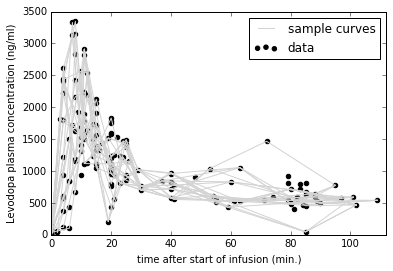

In [37]:
plot_data_and_samples(25,savepng=False)

## Definitions

We're defining $C_p(t)$ (in 2 parts, to fit the 2 infusion rates) based on differential equations for a 2-compartment model.
* Time $t$ is in minutes. Domain: $t\ge 0$.
* Compartments
    - Compartment 1 = plasma
    - Compartment 2 = rest of the body accessible to plasma
    - $V_i$ = volume of compartment $i$, here assumed to be constant. $VOD_{ss} = V_1 + V_2$.
* Drug mass: $X_i(t)$ = quantity of levodopa in compartment $i$ at time $t$
* Rate constants:
    - $k_1$ = distribution from plasma; $k_2$ = return to plasma
    - $k_0$ = elimination from body
        + Here = In https://www.boomer.org/c/p4/c19/c1902.html
        + $k_0$ = $k_{el}$
        + $k_1$ = $k_{12}$
        + $k_2$ = $k_{21}$
    - Thus (approximately), $\alpha, \beta = \frac{S \pm \sqrt{S^2 - 4P}}{2}$, where $S=k_0+k_1+k_2$ and $P=k_0k_2$.
    - [This page](https://www.boomer.org/c/p4/c19/c1903.html) tells how to go from $\alpha, \beta$ ***and*** $A$ and $B$ to $k_0, k_1$, and $k_2$. 

* Infusion rates:
    - $R_L$ (loading rate) for $t\le t_L$ (the length of the loading dose)
    - $R_M$ (maintenance rate) for $t> t_L$
    - See [Black et al. 2003](https://www.ncbi.nlm.nih.gov/pubmed/12865145) for the actual values of $R_L$ and $R_M$ depending on age and body mass. For use here, they should be given in **ng**/min rather than mg/min.


## Parameter reduction

### At $t=\infty$, equilibrium has been reached.

Thus (1) the rate of drug entering the body (the maintenance infusion rate $R_M$) = rate of drug leaving the body, or:

$$R_M = k_0 X_1(\infty)$$

$$\implies X_1(\infty) = \frac{R_M}{k_0}$$

(2) The equilibrium also applies to the transfer between compartments 1 and 2:

$$k_1X_1(\infty) = k_2X_2(\infty)$$

$$\implies X_2(\infty) = \frac{k_1}{k_2}X_1(\infty)$$

$$\hphantom{\implies X_2(\infty) }= \frac{k_1R_M}{k_2k_0}$$

In previous notebooks I used the symbol $C_{inf}$. 

$$C_{inf} = \frac{X_1(\infty)}{V_1} = \frac{X_2(\infty)}{V_2}$$

$$\hphantom{C_{inf} }= \frac{R_M}{k_0V_1} = \frac{k_1R_M}{k_2k_0V_2}$$

Therefore

$$V_2 = \frac{k_1}{k_2} V_1$$

Remember all of this **assumes** that the $k_{ij}$s are constant. 


## All that leads to this pair of differential equations:

For $t < t_L :$

$$ X_1'(t) = R_L - (k_0+k_1)X_1 + k_2X_2 $$

$$ X_2'(t) = \hphantom{R_L - (k_0+)} k_1X_1 - k_2X_2 $$

We will stipulate that $X_1(0)\,/\,V_1 = X_2(0)\,/\,V_2 = C_0$, where $C_0$ is the venous drug concentration at the beginning of the study ("left over" from the previous night's doses, and probably around 55ng/ml according to the 2003 study). We **assume** that all these concentrations are essentially in equilibrium at the start of the infusion. That's reasonable given the study design with patients coming in in the "practical off" state. In any case, the peripheral venous concentration at the start of the infusion is our best estimate of the initial drug concentration in either compartment. 

In other words, initial conditions are $X_1(0) = V_1 C_0$ and $X_2(0) = V_2 C_0$. 

For $t \ge t_L$ the equations are identical except that $R_L$ is replaced by $R_M$, and the initial conditions (now meaning at $t= t_L$) are determined by $X_1(t_L)$ and $X_2(t_L)$ from the equations above for $t < t_L$.

### Circulation delay

The original time:concentration data from the 2003 paper take a minute or two to "take off":

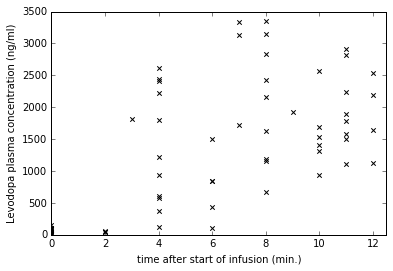

In [38]:
# figure = plt.figure(figsize=(4,7))
plt.scatter(data_times,data_concs,marker='x',color='black')
plt.axis((0,12.5,0,3500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')
plt.show()

This observation, plus biological necessity, suggests **we should also include** in the final model the delay from infusion in one upper extremity vein to the right heart, to the lungs, to the left heart, to the arteries, to a vein on the other side of the body, where we sample the blood. This could be modeled in various ways, but it is probably OK to **assume** a simple fixed delay, *i.e.* essentially a change of axis in the differential equations above from $t$ to $t-t_s$ (for time shift), though we could instead model it as another, mixing "compartment." Our PET experience in older adults suggests that the delay from a venous bolus infusion to its appearance in the cerebral arteries is probably 15-40 seconds. So $t_s$ is probably in the range 10-60 seconds. The graph suggests it could possibly be 2 minutes or more, but note that there are few data points before $t=4$ min, so take that 2+ minute thing with a grain of salt.

## OK. Closed-form solutions from Maxima go here.
Generic solution to
$$ 
x_1^\prime(t) = -k_0 x_1(t) -k_1 x_1(t) + k_2 x_2(t) + R \\
x_2^\prime(t) = \hphantom{-k_0 x_1(t) }k_1 x_1(t) - k_2 x_2(t) \\
$$
See 20170922_pk.wxmx for derivation. The idea is to use $R=R_L$ for $0\le t\le t_L$ and $R=R_M$ for $t>t_L$. Initial conditions for the loading phase are $x_1(0)/V_1=x_2(0)/V_2=C_0$. Initial conditions for the maintenance phase ($t>t_L$) come from $x_1(t_L)$ and $x_2(t_L)$ using the solution for the loading phase. The parameters `x10` and `x20` in the next cell mean $x_1(0)$ and $x_2(0)$ respectively. `ts` is for "time shift."

In [259]:
def generic_x1(t,k0,k1,k2,R,x10,x20,ts):
    '''Returns a closed-form solution to the problem in the cell above. 
    The return value and the parameter t are numpy arrays. Other parameters are real numbers.
    '''
    u = t-ts
    rad = (k0+k1+k2)**2 - 4*k0*k2
    if rad > 0 :
        sqrad = math.sqrt(rad)
        return np.exp(-u*(k0+k1+k2)/2)*( \
                    np.sinh(u*sqrad/2)* ((k0-k1-k2)*R/k0 + x10*(k2-k1-k0) + 2*x20*k2)/sqrad \
                  + np.cosh(u*sqrad/2)*(x10-R/k0) ) + R/k0 
    elif rad < 0 :
        sqrad = math.sqrt(-rad)
        return np.exp(-u*(k0+k1+k2)/2)*( \
                    np.sin(u*sqrad/2)*(2*k2*x20+x10*(k2-k1-k0)+R*(k0-k1-k2)/k0)/sqrad \
                  + np.cos(u*sqrad/2)*(x10-R/k0) ) + R/k0 
    else:  # rad = 0
        return np.exp(-u*(k0+k1+k2)/2)*( u*(2*k2*x20+x10*(k2-k1-k0)+R*(k0-k1-k2)/k0)/2+x10-R/k0 ) + R/k0

def generic_x2(t,k0,k1,k2,R,x10,x20,ts):
    '''Returns a closed-form solution to the problem in the cell above. 
    The return value and the parameter t are numpy arrays. Other parameters are real numbers.
    '''
    u = t-ts
    rad = (k0+k1+k2)**2 - 4*k0*k2
    if rad > 0 :
        sqrad = math.sqrt(rad)
        return  np.exp(-u*(k0+k1+k2)/2)*( \
                    np.sinh(u*sqrad/2)*(x20*(k0+k1-k2)+2*k1*x10-R*k1*(k0+k1+k2)/(k0*k2))/sqrad \
                  + np.cosh(u*sqrad/2)*(x20-R*k1/(k0*k2)) ) + R*k1/(k0*k2)
    elif rad < 0 :
        sqrad = math.sqrt(-rad)
        return np.exp(-u*(k0+k1+k2)/2)*( \
                    np.sin(u*sqrad/2)*(2*x10*k1+x20*(k0+k1-k2)-R*k1*(k0+k1+k2)/(k0*k2))/sqrad \
                  + np.cos(u*sqrad/2)*(x20-R*k1/(k0*k2)) ) + R*k1/(k0*k2) 
    else:  # rad = 0
        return np.exp(-u*(k0+k1+k2)/2)*( \
                    u*(2*k1*x10 +(k0+k1-k2)*x20-R*k1*(k0+k1+k2)/(k0*k2))/2 + x20-R*k1/(k0*k2) ) \
                    + R*k1/(k0*k2)

In [260]:
def c1(t,k0,k1,k2,V1,V2,ts,C0,RL,RM,tL=10.0):
    '''Returns a numpy array with C1(t), based on the generic solution above.
       Note the division of x1(t) by V1, in the last line, to return concentration not mass.
    '''
    def x1_load(t):
        return generic_x1(t,k0,k1,k2,RL,C0*V1,C0*V2,ts)
    def x2_load(t): 
        return generic_x2(t,k0,k1,k2,RL,C0*V1,C0*V2,ts)
    def x1_maint(t):
        return generic_x1(t-tL,k0,k1,k2,RM,x1_load(tL),x2_load(tL),ts)
    return np.where(t<=tL,x1_load(t),x1_maint(t))/V1

### The function that `curve_fit` sees can't have fixed parameters. Create a wrapper function for `c1(t)` that has only parameters to be estimated.

In [283]:
def c1_for_estimation(t,k0,k1,k2,V1,V2,ts):
    return c1(t,k0,k1,k2,V1,V2,ts,C0_known,RL_known,RM_known,tL_known)

### Set bounds for the `curve_fit` routine to use in estimating PK parameters:

In [284]:
mass_known = 70 # kg
age_known = 60 # yr
C0_known = 55  # ng/ml
tL_known = 10  # min.
RL_known = 0.6426 * mass_known * 1e6 / tL_known # ng/min
RM_known = 2.882E-5 * mass_known * (140-age_known) * 1e6  # ng/min
print('RL_known (mg/min.) = {0:.4f}'.format(RL_known/1e6))
print('RM_known (mg/min.) = {0:.4f}'.format(RM_known/1e6))

RL_known (mg/min.) = 4.4982
RM_known (mg/min.) = 0.1614


In [342]:
# Check for plasma volume: PMID: 1110403
v1_est = 3000*mass_est/70  # units: ml
# VODss estimate from http://www.frontiersin.org/files/Articles/168565/fphar-06-00307-HTML/image_m/fphar-06-00307-t002.jpg
v2_est = 1.18e3*mass_est - v1_est  # units: ml
# Elimination half-life is about 1.5 hr (http://www.frontiersin.org/files/Articles/168565/fphar-06-00307-HTML/image_m/fphar-06-00307-t002.jpg)
k0_est = ln2over(1.5*60)   # units: 1/min.
# The next line is very approximate; from the same source, t1/2alpha is about 0.14 hr.
k1_est = ln2over(0.14*60)  # units: 1/min.
# From equilibrium, k2 is approx. k1*V1/V2. (See "parameter reduction", above.)
k2_est = k1_est*v1_est/v2_est  # units: 1/min.
# See above (from PET experience).
ts_est = 20/60.  # units: min.

# def c1_for_estimation(t,k0,k1,k2,V1,V2,ts):
myp0 = (k0_est, k1_est, k2_est, v1_est, v2_est, ts_est)

# convert guesses for half-lives into rate constants:
mybounds = ((ln2over(300), ln2over(30),  0, 800*v1_est/3000,0.5*v2_est, 5/60.), 
            (ln2over(50),  ln2over(3), 5,4600*v1_est/3000,  2*v2_est,75/60.))

In [343]:
def print_PK_ests(*ks,head='std'):
    if head=='std':
        head = '  k0\t  k1\t  k2\t v1\t  v2\t ts'
    if head==None:
        pass
    else:
        print(head)
    print('{0:.4f}\t{1:.3f}\t{2:6.4f}\t{3:4.0f}\t{4:6.0f}\t{5:5.3f}'.format(*ks))

print('rough guesses for PK parameters:')
print_PK_ests(*myp0)

# See above near link to boomer.org for following:
S = popt[0]+popt[1]+popt[2]
P = popt[0]*popt[2]
print('thalf approx. = {0:.0f} min.'.format(ln2over((S-math.sqrt(S*S-4*P))/2)))
print('thalfalpha approx. = {0:.1f} min.'.format(ln2over((S+math.sqrt(S*S-4*P))/2)))

print('\nbounds for curve_fit routine are set as follows:')
print_PK_ests(*mybounds[0])
print_PK_ests(*mybounds[1],head=None)

rough guesses for PK parameters:
  k0	  k1	  k2	 v1	  v2	 ts
0.0077	0.083	0.0031	3000	 79600	0.333
thalf approx. = 669 min.
thalfalpha approx. = 2.6 min.

bounds for curve_fit routine are set as follows:
  k0	  k1	  k2	 v1	  v2	 ts
0.0023	0.023	0.0000	 800	 39800	0.083
0.0139	0.231	5.0000	4600	159200	1.250


In [344]:
def plot_one_sample_with_data_and_fit(n=4,savepng=False):
    plt.axis((0,112,0,3500))
    plt.xlabel('time after start of infusion (min.)')
    plt.ylabel('Levodopa plasma concentration (ng/ml)')
    plt.plot(t_samples[0],c_samples[n],
        color='grey',marker=None,linewidth=2.0, 
        label='data sample #'+str(n))
    tees = np.linspace(0,120,121)
    plt.plot(tees,c1_for_estimation(tees, *popt),'r', label='C1, fit to #'+str(n))
    # plot the real data
    plt.scatter(data_times,data_concs,color='black',label='data')
    legend = plt.legend(loc='upper right')
    legend.get_frame().set_facecolor('none')
    if savepng:
        plt.savefig('1sample.png', dpi=600, transparent=True)
    plt.show()

  k0	  k1	  k2	 v1	  v2	 ts
0.0139	0.231	0.0150	4600	 39800	0.083
thalf approx. = 861 min.
thalfalpha approx. = 2.7 min.
ln(2)/k0 = 50.000000. ln(2)/k1 = 3.000000.


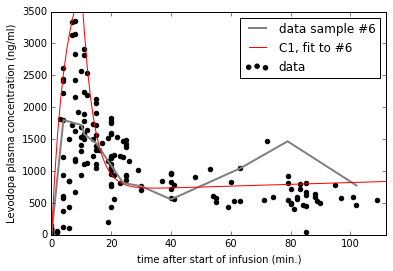

In [345]:
from scipy.optimize import curve_fit

which = 6
#  c1_for_estimation(t,k0,k1,k2,V1,V2)
popt, pcov = curve_fit(c1_for_estimation, t_samples[which], c_samples[which], \
                       p0=myp0, bounds=mybounds)
print_PK_ests(*popt)
# See above near link to boomer.org for following:
S = popt[0]+popt[1]+popt[2]
P = popt[0]*popt[2]
print('thalf approx. = {0:.0f} min.'.format(     ln2over((S-math.sqrt(S*S-4*P))/2)))
print('thalfalpha approx. = {0:.1f} min.'.format(ln2over((S+math.sqrt(S*S-4*P))/2)))
print('ln(2)/k0 = {0:3f}. ln(2)/k1 = {1:3f}.'.format(ln2over(popt[0]),ln2over(popt[1])))
plot_one_sample_with_data_and_fit(which)

## Now that's more like it!!!

OK. Now finally for what we came for.

In [268]:
iterations = sample_n
answers = np.zeros((iterations,len(['k0', 'k1', 'k2', 'V1', 'V2', 'ts']))) 
for i in range(iterations):
    popt, pcov = curve_fit(c1_for_estimation, t_samples[i], c_samples[i], bounds=mybounds)
    answers[i] = popt
answers

array([[  1.73286795e-02,   4.62098120e-01,   5.64919700e-02,
          7.50000000e+03,   3.25000001e+04,   4.05960922e-01],
       [  1.73286795e-02,   2.20202144e-01,   2.46632629e-02,
          7.50000000e+03,   1.30000000e+05,   1.59744819e-01],
       [  1.73286795e-02,   3.98864420e-01,   6.32468439e-02,
          7.50000000e+03,   3.25000000e+04,   1.02535796e+00],
       [  1.73286795e-02,   2.73067785e-01,   4.40751024e-02,
          7.50000000e+03,   1.30000000e+05,   8.33333333e-02],
       [  1.73286795e-02,   2.48465431e-01,   2.57876757e-02,
          7.50000000e+03,   3.25000003e+04,   8.33333337e-02],
       [  1.73286795e-02,   2.09092949e-01,   2.39371198e-02,
          7.17809041e+03,   1.30000000e+05,   8.33333333e-02],
       [  1.73286795e-02,   4.62098120e-01,   5.72927114e-02,
          5.98439908e+03,   1.30000000e+05,   8.33333333e-02],
       [  1.73286795e-02,   4.62098120e-01,   7.35821830e-02,
          7.50000000e+03,   3.25000000e+04,   5.08084515e-01],


In [269]:
print("mean ['k0', 'k1', 'k2', 'V1', 'V2', 'ts'] = ", np.mean(answers,axis=0))
print("S.D. ['k0', 'k1', 'k2', 'V1', 'V2', 'ts'] = ", np.std( answers,axis=0))
print("CoV  ['k0', 'k1', 'k2', 'V1', 'V2', 'ts'] = ", np.std(answers,axis=0)/np.mean(answers,axis=0))  # elementwise division

mean ['k0', 'k1', 'k2', 'V1', 'V2', 'ts'] =  [  1.73211566e-02   3.31653704e-01   4.90449293e-02   7.18354337e+03
   6.64877281e+04   3.97776350e-01]
S.D. ['k0', 'k1', 'k2', 'V1', 'V2', 'ts'] =  [  7.48515640e-05   1.19038118e-01   2.48259387e-02   9.25603710e+02
   4.59661334e+04   3.96272170e-01]
CoV  ['k0', 'k1', 'k2', 'V1', 'V2', 'ts'] =  [ 0.0043214   0.35892293  0.50618767  0.12885058  0.69134763  0.99621853]


**We can try it with all the data, though I'm not sure that will work for reasons noted before.**

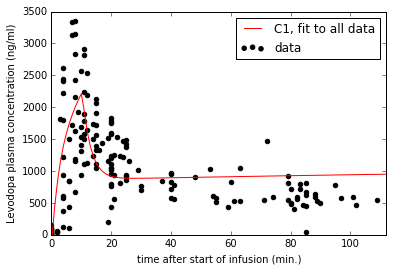

['k0', 'k1', 'k2', 'V1', 'V2', 'ts'] =  [  1.73286795e-02   2.93896908e-01   5.08970169e-02   7.50000000e+03
   3.25000000e+04   3.48175024e-01]


In [270]:
popt, pcov = curve_fit(c1_for_estimation, data_times, data_concs, bounds=mybounds)
plt.axis((0,112,0,3500))
plt.xlabel('time after start of infusion (min.)')
plt.ylabel('Levodopa plasma concentration (ng/ml)')
tees = np.linspace(0,120,121)
plt.plot(tees,c1_for_estimation(tees, *popt),'r', label='C1, fit to all data')
# plot the real data
plt.scatter(data_times,data_concs,color='black',label='data')
legend = plt.legend(loc='upper right')
legend.get_frame().set_facecolor('none')
#    plt.savefig('1sample.png', dpi=600, transparent=True)
plt.show()
print("['k0', 'k1', 'k2', 'V1', 'V2', 'ts'] = ", popt)

**Yup. That didn't work so well.** Note that V1 is stuck to the upper bound (`(3/2)*5000`), yet this parameter really has to be close to the range of 3000-5000 ml as it represents plasma (more or less). 

In [15]:
# Exact parameters, i.e. not to be fit:
tL = 10.0 # duration of loading dose, in minutes
age = 55.0 # years
bodymass = 70.0 # kg
RL = 0.6426e6 * bodymass / tL   # loading dose **rate**, in **ng**/min
    # Loading dose: 0.6426mg / kg / (10 min.), times 1E6 ng / mg
    # these rates are from Black et al 2003, cited above
RM = 2.882 * 10 * (140-age)     # maintenance dose rate, in **ng**/min
    # Maintenance rate: 2.882 mg/kg/min. × 10−5 × (140 year − age)/year, times 1E6 ng / mg

# Derived parameters, also not to be fit. Computed inside
#   function definitions below for y = [X1, X2].
# Cinf = RM/(k0*V1) # from equilibrium (see above, under "Parameter reduction")
# V2 = V1*(k1/k2) # also from equilibrium (assumes these 4 parameters are, in fact, constant)
# u = t - ts
# R = RL if t < tL; R = RM if t >= tL

# Following the example in 
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.odeint.html
def pk(y, t, ts, R, k0, k1, k2):
    x1, x2 = y
    if t-ts < 0:
        R = 0  # TODO: t shouldn't be negative ... error? 
    elif t-ts >= tL:
        R = RM
    else:   # 0 <= t-ts < tL,  i.e. during the loading dose (adjusted for delay, ts)
        R = RL
    dydt = [ R - (k0+k1)*x1 + k2*x2 , 
                     k1 *x1 - k2*x2  ]
    return dydt

# oops -- all of the variables below are supposed to be fit to the data, not constants I'm supplying
# y0 = [C0*V1, C0*V1*k1/k2]  # = X1(0), X2(0)

# What we want is more like http://cars9.uchicago.edu/software/python/lmfit/
# or https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [ ]:
#  def X1(t, ts, C0, k0, k1, k2, V1):

# initial conditions:
# for t=ts, i.e. u = 0:
# X1(u=0) = V1 * C0
# X2(u=0) = V2 * C0

# for u=tL:
# X1(u=tL) = X1(u=tL) as computed from the left (where R=RL)
# X2(u=tL) = X2(u=tL) as computed from the left (where R=RL)

## Plan
1. ~~Generate 100 or so samples from data (above) by selecting one point from each "glob set" above.~~
2. Write $Cp(t)$ (in 2 parts, to fit 2 infusion rates) as a function of $k_{ij}$, $V_1$, and $V_2$, using the known infusion rates.
3. Use scipy.optimize.curve_fit to estimate the parameters above for each of the 25 samples. 
4. Plot a figure like the 2nd one below, but with 25 curvy $C_p(t)$'s based on the previous step, and
5. Plot all of those curves in gray over the data from above (in black).
6. Assuming that figure looks OK, report the median and range of each parameter ($k_{ij}$'s and $V_i$'s). Could consider here re-doing the figure based on sampling from the distributions characterized by those medians and ranges, but probably the set of those 100 curves (or a random subset of, say, 25 of them) is good enough.
7. Now for the fun part.
    * Combine those curves with a range of PD variables ($k_e$, $n$) from best / H&Y 1/2/3/4 / worst, 
    * add noise, 
    * sample PK curves 8-10 per subject, 
    * sample rCBF data based on proposed MRI acquisition times,
    * estimate [PK parameters then] PD parameters from this real-world-ish data, 
    * estimate disease severity from the output $k_e$ and $n$, and
    * compare these results to input PD parameters and [computed] input disease severity to test the method's accuracy.

NameError: name 'stacked' is not defined

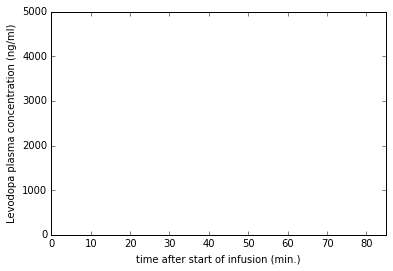

In [14]:
%matplotlib inline

t = np.asarray([0,10,29.7,82])

plt.axis((0,85,0,5000))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')
for i in range(100):
    plt.plot(t,stacked[i,:],color='lightgrey',marker=None,linewidth=1.0, label='_nolegend_')
plt.plot(t,np.mean(stacked,axis=0),'k',linewidth=2,label='mean of 100 samples')
plt.plot(times,concs,'white',markerfacecolor='red',markeredgecolor='red',\
         marker='o',markersize=7,label='globbed points')
plt.legend(loc='upper right')
plt.show() 

In [ ]:
print('Mean of 100 samples:')
print('time:',t)
print('[LD]:',np.around(np.mean(stacked,axis=0)))
print('Globbed points:')
print('time:',times)
print('[LD]:',np.around(concs))

In [ ]:
headerstring = str(t.tolist()).translate({ord(c): None for c in '[]'})
# Thanks, http://stackoverflow.com/questions/3939361/remove-specific-characters-from-a-string-in-python
headerstring

In [ ]:
# np.savetxt('cp100.csv', stacked, delimiter=',', header=headerstring, comments='')
np.savetxt('cp100.csv', stacked, delimiter=',', header='Time in minutes: '+headerstring)

So. *diff* can be anywhere from 3 to 300, best guess 45, and $C_{\infty}$ is probably between about 400 and 600, best guess 450.

In [ ]:
# FOR TESTING
Cinf = 450
diff = 45
#
times  = np.asarray([0.,       4.5,    9.0,  29.7,  82.0])
concs  = np.asarray([56.21, 1226.7, 2237.9, 828.7, 624.2])

times_late  = np.asarray([10.,   29.7,  82.0])
concs_late  = np.asarray([2441., 828.7, 624.2])

startbeta = find_beta(concs[-2],concs[-1],450)
p0test = [2000,0.12,100,0.003,550]
boundstest = ([100,0.03,100,0.001,100],[np.inf,np.inf,np.inf,0.03,1000])

from scipy.optimize import curve_fit
popt, pcov = curve_fit(Cp_late,times_late,concs_late,p0test,bounds=boundstest)
print(popt)
print(pcov)

In [ ]:
Cp(times,concs[0],concs[2],*popt)

In [ ]:
time = np.arange(0,121)

plt.axis((0,85,0,5000))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')

for i in range(100):
    plt.plot(t,stacked[i,:],color='lightgrey',marker=None,linewidth=1.0, label='_nolegend_')
# plt.plot(t,np.mean(stacked,axis=0),'k',linewidth=2,label='mean of 100 samples')
plt.plot(times,concs,'white',markerfacecolor='red',markeredgecolor='red',\
         marker='o',markersize=7,label='globbed points')
plt.legend(loc='upper right')

plt.plot(time,Cp(time,concs[0],concs[2],*popt),color='black',linewidth=3.0,label='fit-ish')

plt.show() 

In [ ]:
zeroes   = np.mean(data_concs[data_times<2.5])

In [ ]:
data_times[data_times<2.5]

In [ ]:
data_concs[data_times<2.5]

In [ ]:
print('label:\t{0:>9s}\t{1:>9s}\t{2:>9s}\t{3:>9s}\t{4:>9s}'.format('A','alpha','B','beta','Cinf'))
print('popt:',end='\t')
for x in popt:
    print('{:9.3f}'.format(x),end='\t')
print()
print('p_SD:',end='\t')
for x in np.sqrt(np.diag(pcov)):
    print('{:9.3f}'.format(x),end='\t')

In [ ]:
plt.scatter(data_times,data_concs,color='black',label='data')
plt.axis((0,120,0,3500))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')
# plot the globbed points
plottimes=(zero_time,five_time,eight_time,eleven_time,fifteen_time,twenty_time,twen5_time,
           thirty_time,forty_time,sixty_time,eighty_time,late_time)
plotconcs=(zeroes,fives,eights,elevens,fifteens,twenties,twen5s,thirties,forties,sixties,
           eighties,lates)
plt.plot(plottimes,plotconcs,'coral',
         markersize=8,marker=('D'),markeredgewidth=0,linewidth=2.0,label='globbed')
time=np.arange(0,121)
p_hi  = popt + np.sqrt(np.diag(pcov))
p_low = np.maximum(popt - np.sqrt(np.diag(pcov)),np.zeros_like(popt))
plt.plot(time,Cp(time,zeroes+zero_SD,eights+eight_SD,*p_hi),
         color='darkturquoise',linewidth=1,label='fit+1SD')
plt.plot(time,Cp(time,concs[0],concs[2],*popt),color='darkturquoise',linewidth=2.5,label='fit')
plt.plot(time,Cp(time,zeroes-zero_SD,eights-eight_SD,*p_low),
         color='darkturquoise',linewidth=1,label='fit-1SD')
plt.legend(loc='upper right')
plt.show

# Next:
See the text after box 10 for some details.

1. **DONE.** Fit $C_{p\beta}(t) = C_\infty + Be^{-\beta(t-10)}$ to the data points $(29.7,C_p(29.7))$ and $(82,C_p(82))$ in each curve.
2. Choose $A$ and $\alpha$ so $Ae^{-\alpha(t-t_L)}$ is $C_p(t_L)-C_{b\beta}(t_L)$ at $t=t_L$ and is $diff$ when $t=29.7$.
3. Generate and plot the 100 resulting curves, and then save them as 4dfp images (a 1-volume image for the 100 values of each parameter, i.e. Cp(0), Cp(9), A, alpha, B, beta, plus a 100-volume image for the 100 time courses resulting (at each voxel) from the corresponding voxels in the parameter images.
4. Use the 100 time courses and the 6 PD parameter triples (ec50, n, ke) for the 6 illness levels (best, H&Y1, ... H&Y4, worst) to generate 600 expected time-effect curves (no noise added). 
5. LOOK AT RESULTS AT THIS STEP FIRST, without noise added to the time-effect curves, and decide whether changing the total LD dose based on roughly estimated PD severity is something we want to do. 
6. THEN, Add several levels of noise with some (small) number of replicates (voxels) for each noise level. Warning, if we try to do 100 voxels for each noise level that's 60,000 time-effect curves for each noise level, say 600,000 time-effect curves if we do 10 levels of noise. I'm not liking that! Maybe 25 voxels for each noise level? Then if we pick, say, 5 levels of noise, we have 100 x 6 x 25 x 5 = 75,000 time-effect curves, which seems more tractable but still a lot. Look, **let's start with 25 rather than 100 PK curves,** producing 25 PK curves x 6 severity groups x 5 noise levels x 25 noise curves at each level = 18,750 time-effect curves. If the next step runs quickly we can add more, but this should be plenty to get the general effect for us even if not enough for us to be completely confident in the error magnitude.
7. Provide the resulting time courses without noise, n=150 (=25x6) and with noise (n=thousands) to Bayes and see how accurately it returns the input pharmacodynamic parameters.

# Wait.

How about we just use the "stacked" $C_p(t)$ curves (gray lines in boxes 25 and 26 above) as the input? Until we have better data, we'll be using this kind of data anyway for each subject. 

Well, actually, we'd be doing more blood draws in the first 20 or so minutes after the end of the loading dose, so I guess not.